# Import Modules

In [2]:
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import os
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn import svm

# Store Model Information

In [3]:
model_cols = ['ModelName','Accuracy','Precision','Recall','Mean Squared Error']
model_info = pd.DataFrame(columns=model_cols)

# Load Cleaned Data

In [4]:
filePath = os.path.join('Data','Stage','NoShowAppointments_cleaned.csv')
df = pd.read_csv(filePath,low_memory=False)

# Build data to model

In [5]:
X = df.drop(['NoShow','AppointmentID','PatientId'], axis=1)
y = df['NoShow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression

#instantiate mode
logmodel = LogisticRegression(verbose=True,max_iter=1000)

#fit the model with data
logmodel.fit(X_train,y_train)

#Use model to predict
y_pred = logmodel.predict(X_test)

#Evaluate accuracy of the model
acc_log = round(logmodel.score(X_test, y_test) * 100, 2)
acc_log

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s finished


82.77

In [6]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[27746,  1455],
       [ 4829,  2444]])

In [7]:
print(metrics.classification_report(y_test, logmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     29201
           1       0.63      0.34      0.44      7273

    accuracy                           0.83     36474
   macro avg       0.74      0.64      0.67     36474
weighted avg       0.81      0.83      0.81     36474



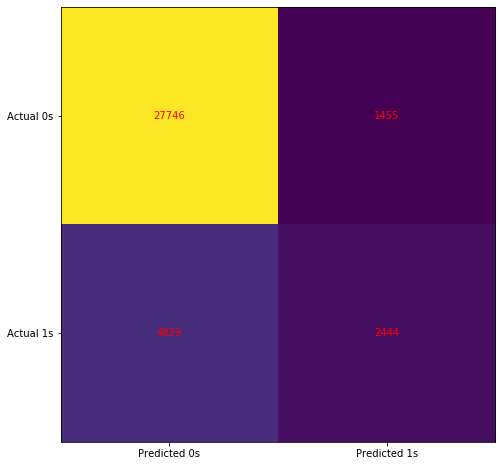

In [8]:
cm = metrics.confusion_matrix(y_test, logmodel.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8277128913746779
Precision: 0.6268273916388818
Recall: 0.3360373985975526


In [10]:
name = 'Logistic'
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
msqe = metrics.mean_squared_error(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

In [11]:
model_info = model_info.append(
    {
        'ModelName': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Mean Squared Error': msqe
    },
    ignore_index=True)

# Recursive Feature Elimination

# Feature Importance

In [12]:
#get feature importance
predictors = X_train
selector = RFE(logmodel, n_features_to_select = 1)
selector = selector.fit(predictors, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Us

In [13]:
#look at the ranking
order = selector.ranking_
order

array([ 48,  52,  79,  73,  10,  89,   1,  90, 110,   6,  51,  27,  17,
        24,  43,  74,  12,  16,  39,  40,  71,  78,  36,  49,   3,  76,
        37,  67,  42,  23,   7,  83,  26,   8,  33, 109,  11,   9,  44,
        45,  38,   5,  25,  66,  53,  34,  46,   4,  92,  14,  47,  62,
        97,  82,  91,  61,  35,  28,  84,  93,  65,  29,  95,  69, 104,
        22,  86,  31,  87,  30,  64,  15, 106,  21,  41,  50,  32,  80,
        20,  77,  63,  18, 107,  13,  59,  75,  94,  19,  68,  58,  70,
        96,  60,  85, 102,  72,  98, 103,  88,  55, 108,  54,  99, 101,
       100,  56, 105,  81,  57,   2])

In [14]:
cols = [c for c in df.columns if c not in ['NoShow', 'PatientId', 'AppointmentID']]

In [15]:
#get the detail(name of column) behind the rank
feature_rank = dict(zip(order,cols))
for f in sorted(feature_rank):
    print(f,feature_rank[f])


1 SameDayAppointment
2 NoShowSum
3 Neighborhood_COMDUSA
4 Neighborhood_ILHAS OCEANICAS DE TRINDADE
5 Neighborhood_HORTO
6 Age Group_Toddler/baby
7 Neighborhood_DO CABRAL
8 Neighborhood_ENSEADA DO SUA
9 Neighborhood_FRADINHOS
10 Handicap
11 Neighborhood_FORTE SAO JOAO
12 Neighborhood_ARIOVALDO FAVALESSA
13 Neighborhood_SANTOS DUMONT
14 Neighborhood_ITARARE
15 Neighborhood_REPUBLICA
16 Neighborhood_BARRO VERMELHO
17 Age Group_Elderly
18 Neighborhood_SANTO ANDRE
19 Neighborhood_SAO JOSE
20 Neighborhood_SANTA LUIZA
21 Neighborhood_ROMAO
22 Neighborhood_PARQUE MOSCOSO
23 Neighborhood_DE LOURDES
24 Neighborhood_AEROPORTO
25 Neighborhood_ILHA DAS CAIEIRAS
26 Neighborhood_DO QUADRO
27 Age Group_Adult
28 Neighborhood_MARIO CYPRESTE
29 Neighborhood_MORADA DE CAMBURI
30 Neighborhood_PRAIA DO SUA
31 Neighborhood_PONTAL DE CAMBURI
32 Neighborhood_SANTA HELENA
33 Neighborhood_ESTRELINHA
34 Neighborhood_ILHA DO FRADE
35 Neighborhood_MARIA ORTIZ
36 Neighborhood_CARATOIRA
37 Neighborhood_CONSOLACAO
38 

In [16]:
# show AUC
metrics.roc_auc_score(y_test, y_pred)

# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)

print(precision)

[0.19940231 0.62682739 1.        ]


In [17]:
print(recall)

[1.        0.3360374 0.       ]


In [18]:
print(thresholds)

[0 1]


In [19]:
metrics.average_precision_score(y_test, y_pred)

0.34303312516990847

# Decision Tree

In [20]:
# Decision Tree
#########
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

#Use model to predict
y_pred = dtree.predict(X_test)

#Evaluate accuracy of the model
acc_dtree = round(dtree.score(X_test, y_test) * 100, 2)
acc_dtree

84.99

In [21]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8499479080989197
Precision: 0.6270827449872918
Recall: 0.6106146019524268


In [22]:
name = 'Decision Tree'
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
msqe = metrics.mean_squared_error(y_test, y_pred)

In [23]:
model_info = model_info.append(
    {
        'ModelName': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Mean Squared Error': msqe
    },
    ignore_index=True)

# Random Forest

In [24]:
# Random Forest
#########
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, random_state=101, n_jobs=-1)
rfc.fit(X_train, y_train)

#Use model to predict
y_pred = rfc.predict(X_test)


In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8649997258320996
Precision: 0.6452330901446767
Recall: 0.7174480956964114


In [26]:
name = 'Random Forest'
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
msqe = metrics.mean_squared_error(y_test, y_pred)
model_info = model_info.append(
    {
        'ModelName': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Mean Squared Error': msqe
    },
    ignore_index=True)

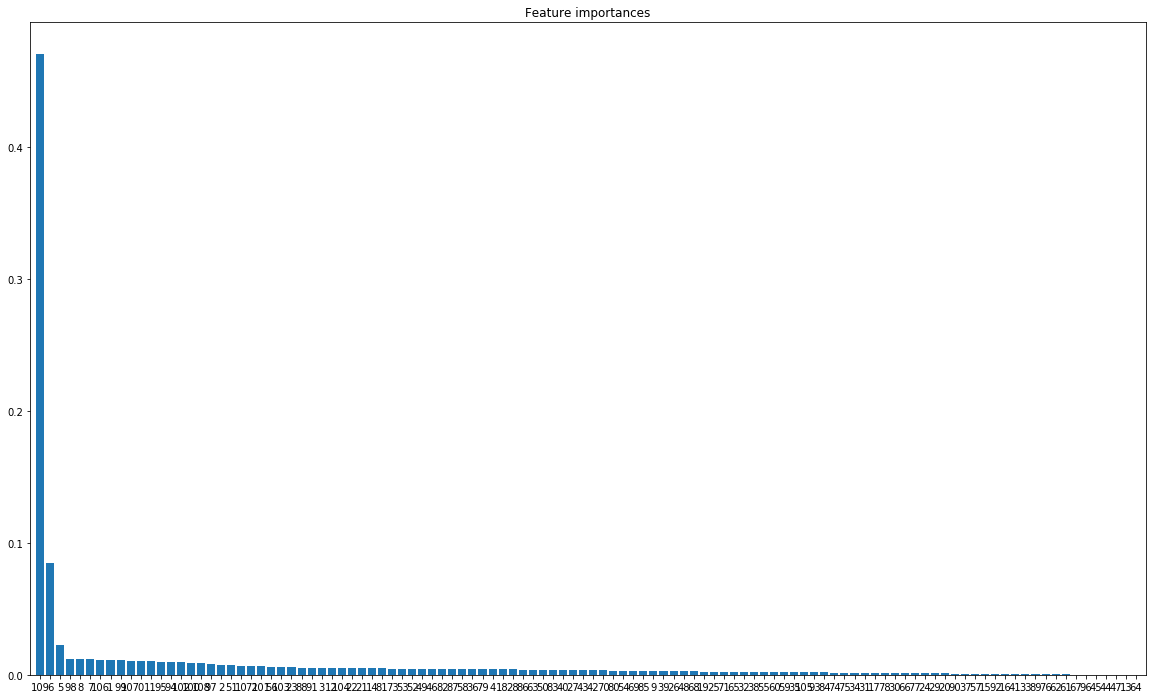

In [27]:
#Evaluate feature importance
importances = rfc.feature_importances_
std = np.std([importances for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

feature_importances = pd.DataFrame(rfc.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(20,12))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Light GBM

In [28]:
#########
# lightGBM (LGBM)
#########
import lightgbm as lgb
#create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

#specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'l2', 'l1', 'rmse'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

#train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

#save model to file
gbm.save_model('model.txt')

#predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)



[1]	valid_0's rmse: 0.389463	valid_0's l1: 0.313532	valid_0's l2: 0.151682
Training until validation scores don't improve for 5 rounds
[2]	valid_0's rmse: 0.38021	valid_0's l1: 0.305939	valid_0's l2: 0.14456
[3]	valid_0's rmse: 0.373273	valid_0's l1: 0.300038	valid_0's l2: 0.139332
[4]	valid_0's rmse: 0.365338	valid_0's l1: 0.293129	valid_0's l2: 0.133472
[5]	valid_0's rmse: 0.358041	valid_0's l1: 0.286558	valid_0's l2: 0.128194
[6]	valid_0's rmse: 0.35133	valid_0's l1: 0.280318	valid_0's l2: 0.123433
[7]	valid_0's rmse: 0.345176	valid_0's l1: 0.274382	valid_0's l2: 0.119146
[8]	valid_0's rmse: 0.339551	valid_0's l1: 0.268751	valid_0's l2: 0.115295
[9]	valid_0's rmse: 0.3344	valid_0's l1: 0.263395	valid_0's l2: 0.111823
[10]	valid_0's rmse: 0.3297	valid_0's l1: 0.258309	valid_0's l2: 0.108702
[11]	valid_0's rmse: 0.325351	valid_0's l1: 0.253461	valid_0's l2: 0.105854
[12]	valid_0's rmse: 0.321381	valid_0's l1: 0.248848	valid_0's l2: 0.103286
[13]	valid_0's rmse: 0.317765	valid_0's l1: 

In [29]:
gbm.feature_importance()

array([ 12,  16,   2,   6,   5,   5,  18,  18,  10,  17,  25,  12,   8,
         0,   3,   0,   1,   0,   8,   0,   0,   6,   0,   3,  11,   1,
         2,   1,   7,   2,   7,   0,   0,   0,   0,   0,  12,   0,   0,
         2,  10,   0,  10,   1,   0,   0,   6,   0,   0,  18,   0,   1,
         1,  15,   1,   2,   8,   0,   0,   1,   0,   0,   0,   1,   0,
         2,   0,   0,   1,   0,   1,   1,   4,   7,   2,   0,   0,   0,
         2,   1,   0,   6,   1,  21,   0,   0,   0,   6,  17,   0,   1,
         0,   0,   1,  21,   7,   0,   3,  11,   8,   8,  12,   6,   5,
         2,   1,   4,  17,   6, 120], dtype=int32)

In [30]:
predictions = [round(value) for value in y_pred]
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.8186927674507869
Precision: 0.7496217851739788
Recall: 0.13625739034786197


In [31]:
name = 'Light GBM'
accuracy = metrics.accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)
msqe = metrics.mean_squared_error(y_test, y_pred)
model_info = model_info.append(
    {
        'ModelName': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Mean Squared Error': msqe
    },
    ignore_index=True)

# XGBOOST

In [32]:
#########
# XGBoost
#########
import xgboost as xgb

xg_log = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 1000)

xg_log.fit(X_train,y_train)

preds = xg_log.predict(X_test)

In [33]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))
predictions = [round(value) for value in preds]

print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("RMSE: %f" % (rmse))

Accuracy: 0.8747875198771727
Precision: 0.6273291925465838
Recall: 0.9165406297263853
RMSE: 0.353854


In [34]:
name = 'XgBoost'
accuracy = metrics.accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)
msqe = metrics.mean_squared_error(y_test, predictions)
model_info = model_info.append(
    {
        'ModelName': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Mean Squared Error': msqe
    },
    ignore_index=True)

# XGBOOST Cross Validation

In [35]:
data_dmatrix = xgb.DMatrix(data=X, label=y)

params = {
    "objective": "binary:logistic",
    'colsample_bytree': 0.3,
    'learning_rate': 0.1,
    'max_depth': 5,
    'alpha': 10
}

cv_results = xgb.cv(dtrain=data_dmatrix,
                    params=params,
                    nfold=5,
                    num_boost_round=50,
                    early_stopping_rounds=10,
                    metrics="rmse",
                    as_pandas=True,
                    seed=123)

cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.482813,0.000053,0.482814,0.000090
1,0.465056,0.006393,0.465051,0.006600
2,0.452213,0.006342,0.452216,0.006621
3,0.439412,0.007375,0.439421,0.007483
4,0.427709,0.011871,0.427701,0.012191


In [36]:
name = 'XgBoost With CrossValidation'
accuracy = metrics.accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions)
msqe = metrics.mean_squared_error(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)
model_info = model_info.append(
    {
        'ModelName': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Mean Squared Error': msqe
    },
    ignore_index=True)
model_info

,ModelName,Accuracy,Precision,Recall,Mean Squared Error
0,Logistic,0.827713,0.626827,0.336037,0.172287
1,Decision Tree,0.849948,0.627083,0.610615,0.150052
2,Random Forest,0.865000,0.645233,0.717448,0.135000
3,Light GBM,0.818693,0.749622,0.136257,0.091033
4,XgBoost,0.874788,0.627329,0.916541,0.125212
5,XgBoost With CrossValidation,0.874788,0.627329,0.916541,0.125212


In [37]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.295225
Name: test-rmse-mean, dtype: float64


# XGBOOST Feature Importance

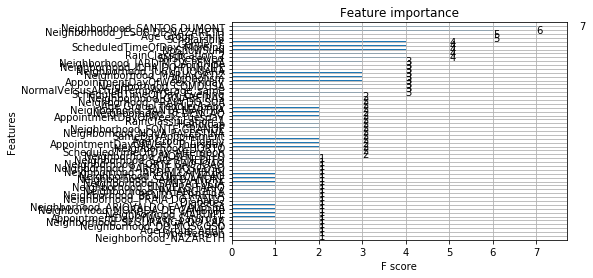

In [38]:
xg_log = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_importance(xg_log)
plt.rcParams['figure.figsize'] = [40, 12]
plt.show()


# TensorFlow

In [39]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [40]:
X = df.drop('NoShow',axis=1).values
y = df['NoShow'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [41]:
scaler = MinMaxScaler()

In [42]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [43]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=110,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=25,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [45]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [46]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 82894 samples, validate on 27632 samples
Epoch 1/600
82894/82894 [==============================] - 6s 68us/sample - loss: 0.4230 - val_loss: 0.2749
Epoch 2/600
82894/82894 [==============================] - 5s 56us/sample - loss: 0.2692 - val_loss: 0.2376
Epoch 3/600
82894/82894 [==============================] - 5s 55us/sample - loss: 0.2474 - val_loss: 0.2376
Epoch 4/600
82894/82894 [==============================] - 6s 70us/sample - loss: 0.2435 - val_loss: 0.2337
Epoch 5/600
82894/82894 [==============================] - 6s 70us/sample - loss: 0.2427 - val_loss: 0.2334
Epoch 6/600
82894/82894 [==============================] - 6s 66us/sample - loss: 0.2416 - val_loss: 0.2325
Epoch 7/600
82894/82894 [==============================] - 6s 68us/sample - loss: 0.2403 - val_loss: 0.2334
Epoch 8/600
82894/82894 [==============================] - 6s 68us/sample - loss: 0.2388 - val_loss: 0.2325
Epoch 9/600
82894/82894 [==============================] - 6s 68us/sample - loss: 0.23

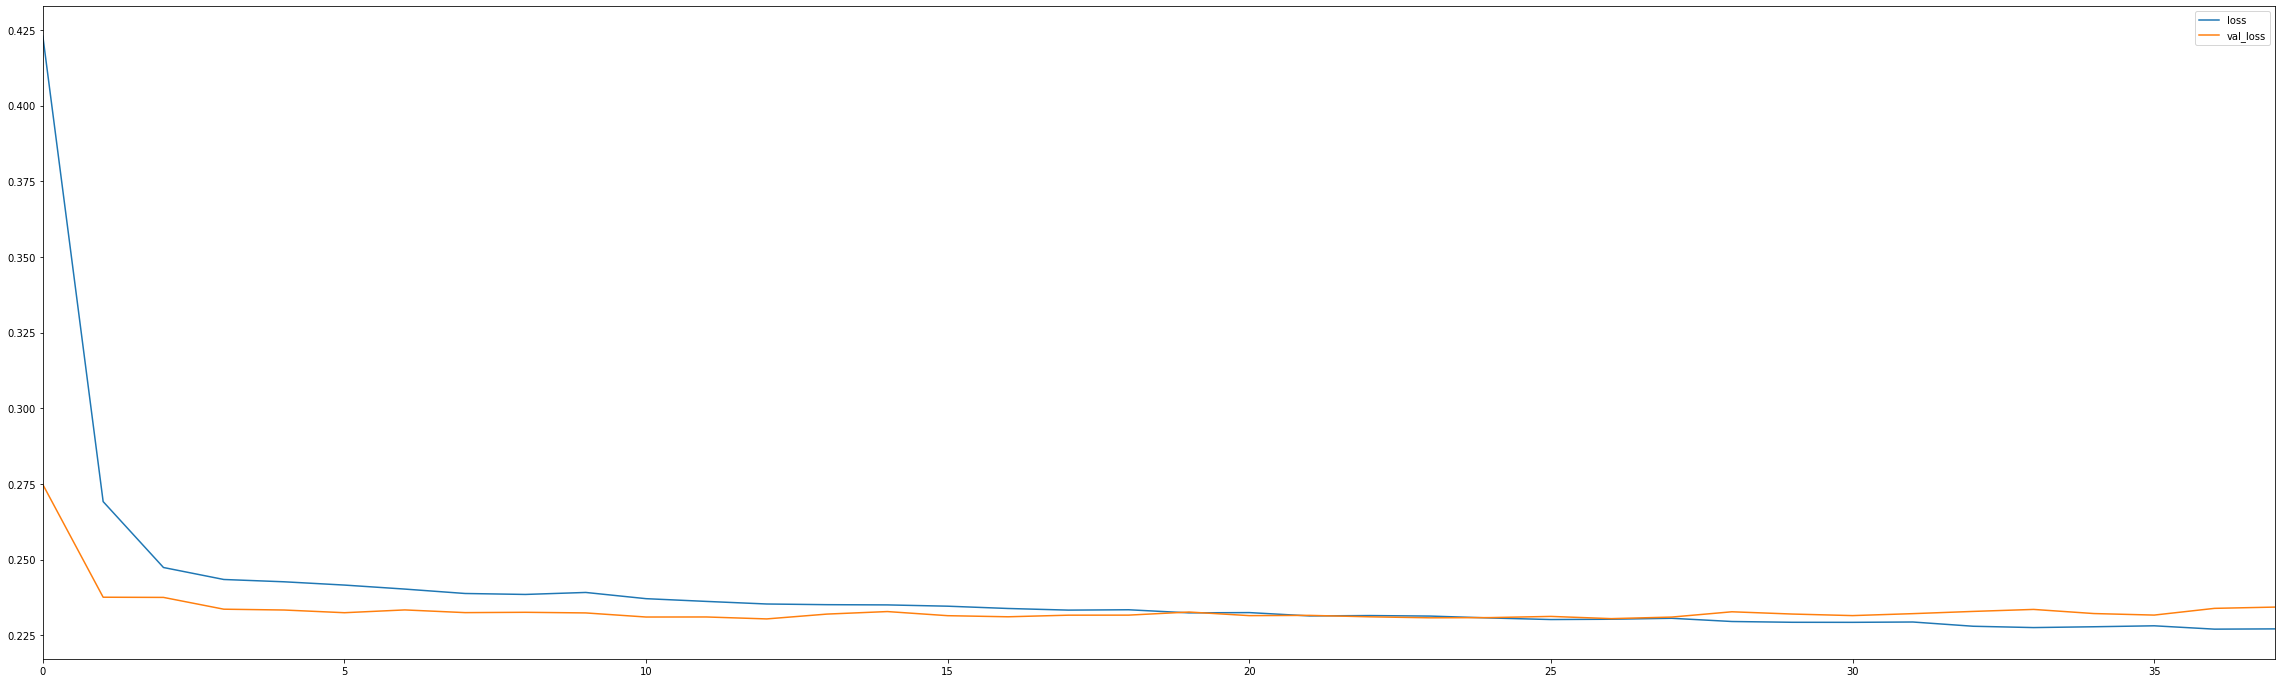

In [47]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [48]:
predictions = model.predict_classes(X_test)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(confusion_matrix(y_test,predictions))

[[19270  2901]
 [  558  4903]]


In [51]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.8748190503763752
Precision: 0.6282675550999487
Recall: 0.8978209119208936


In [52]:
name = 'Artificial Neural Network (ANN)'
accuracy = metrics.accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)
msqe = metrics.mean_squared_error(y_test, predictions)
model_info = model_info.append(
    {
        'ModelName': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Mean Squared Error': msqe        
    },
    ignore_index=True)

# Show Table Metrics

In [1]:
model_info

NameError: name 'model_info' is not defined

# Auto-ML

In [65]:
# prepare files for Auto-ML

#divide dataframe into test and train
test_perc = .33
test = int(df.shape[0] * test_perc)
train = df.shape[0] - test

#fail if length doesn't equal test + train
assert df.shape[0] == test + train

#create file paths for test and train files
filePathTrain = os.path.join('Data','Stage','Appointment_Cleaned_train.csv')
filePathTest = os.path.join('Data','Stage','Appointment_Cleaned_test.csv')

#add files to Stage Folder
df[:train].to_csv(filePathTrain,index=False)
df[:test].to_csv(filePathTest,index=False)

In [66]:
import h2o
from h2o.automl import H2OAutoML, get_leaderboard

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.4" 2019-07-16; OpenJDK Runtime Environment (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3); OpenJDK 64-Bit Server VM (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3, mixed mode, sharing)
  Starting server from /home/narquette/anaconda3/envs/capstone/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmptm4z3tho
  JVM stdout: /tmp/tmptm4z3tho/h2o_narquette_started_from_python.out
  JVM stderr: /tmp/tmptm4z3tho/h2o_narquette_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/GMT
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,1 month and 12 days
H2O cluster name:,H2O_from_python_narquette_0ng4x2
H2O cluster total nodes:,1
H2O cluster free memory:,7.971 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,1
H2O cluster status:,"accepting new members, healthy"


In [67]:
# Import a sample binary outcome train/test set into H2O
train = h2o.import_file(filePathTrain)
test = h2o.import_file(filePathTest)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [72]:
# Identify predictors and response
x = [t for t in train.columns if t not in ['NoShow','AppointmentID','PatientId']]
y = "NoShow"


In [73]:
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# AutoML Leaderboard
lb = aml.leaderboard

# Optionally edd extra model information to the leaderboard
lb = get_leaderboard(aml, extra_columns='ALL')

# Print all rows (instead of default 10 rows)
lb.head(rows=lb.nrows)

# model_id                                                  auc    logloss     aucpr    mean_per_class_error      rmse       mse    training_time_ms    predict_time_per_row_ms
# ---------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------  ------------------  -------------------------
# StackedEnsemble_AllModels_AutoML_20191213_174603     0.789844   0.551067  0.804672                0.314665  0.432045  0.186663                 924                   0.05695
# StackedEnsemble_BestOfFamily_AutoML_20191213_174603  0.789768   0.550906  0.805696                0.313059  0.431977  0.186604                 639                   0.024567
# XGBoost_grid__1_AutoML_20191213_174603_model_4       0.784698   0.55681   0.80312                 0.323143  0.434743  0.189002                3092                   0.002083
# XGBoost_3_AutoML_20191213_174603                     0.784232   0.557749  0.802341                0.317933  0.434976  0.189204                2878                   0.002173
# XGBoost_2_AutoML_20191213_174603                     0.783533   0.555997  0.803189                0.32475   0.434678  0.188945                4635                   0.003292
# XGBoost_grid__1_AutoML_20191213_174603_model_3       0.782582   0.560218  0.800749                0.34334   0.435944  0.190047                2695                   0.002269
# GBM_5_AutoML_20191213_174603                         0.78219    0.558353  0.800234                0.319658  0.435512  0.18967                  768                   0.004318
# XGBoost_1_AutoML_20191213_174603                     0.781901   0.557944  0.801237                0.325446  0.435519  0.189676                4428                   0.003039
# XGBoost_grid__1_AutoML_20191213_174603_model_1       0.781648   0.561112  0.799203                0.312015  0.436434  0.190474                5430                   0.002557
# GBM_2_AutoML_20191213_174603                         0.777673   0.562514  0.796181                0.334056  0.437583  0.191479                 655                   0.003772
# GBM_1_AutoML_20191213_174603                         0.777294   0.562744  0.798244                0.356261  0.437727  0.191605                 700                   0.003571
# GBM_3_AutoML_20191213_174603                         0.775488   0.564794  0.793585                0.327971  0.438722  0.192477                 635                   0.003748
# XGBoost_grid__1_AutoML_20191213_174603_model_2       0.773621   0.578141  0.791949                0.341118  0.443963  0.197104                9722                   0.003896
# GBM_grid__1_AutoML_20191213_174603_model_1           0.772656   0.568314  0.79164                 0.332175  0.440049  0.193643                 647                   0.004546
# GBM_4_AutoML_20191213_174603                         0.77248    0.569483  0.791078                0.336913  0.440873  0.194369                 800                   0.004142
# DRF_1_AutoML_20191213_174603                         0.764975   0.5801    0.781588                0.336001  0.445222  0.198222                1399                   0.007475
# XRT_1_AutoML_20191213_174603                         0.759957   0.585158  0.776857                0.338976  0.447598  0.200344                1426                   0.00495
# GBM_grid__1_AutoML_20191213_174603_model_2           0.748007   0.632981  0.758833                0.375308  0.462237  0.213663                 588                   0.003119
# DeepLearning_grid__2_AutoML_20191213_174603_model_1  0.739884   0.600688  0.747948                0.359883  0.455205  0.207212               40408                   0.010939
# DeepLearning_1_AutoML_20191213_174603                0.700406   0.63169   0.70199                 0.395333  0.469084  0.22004                  445                   0.002288
# DeepLearning_grid__1_AutoML_20191213_174603_model_1  0.692235   0.671512  0.691883                0.409836  0.478393  0.22886                32546                   0.003623
# GLM_1_AutoML_20191213_174603                         0.682648   0.63852   0.680344                0.397234  0.472683  0.223429                 195                   0.001312
#
# [22 rows x 9 columns]


# The leader model is stored here
aml.leader

# If you need to generate predictions on a test set, you can make
# predictions directly on the `"H2OAutoML"` object, or on the leader
# model object directly

preds = aml.predict(test)

# or:
preds = aml.leader.predict(test)

AutoML progress: |████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


In [74]:
preds

predict,p0,p1
0,0.986814,0.0131859
0,0.986671,0.0133286
0,0.986973,0.0130267
0,0.96679,0.0332095
0,0.986628,0.0133715
0,0.986532,0.0134684
1,0.365983,0.634017
1,0.335653,0.664347
0,0.986979,0.013021
0,0.985452,0.0145477


In [75]:
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms
StackedEnsemble_BestOfFamily_AutoML_20200318_013348,0.934304,0.252437,0.708158,0.105185,0.287698,0.0827702,6523,0.066158
StackedEnsemble_AllModels_AutoML_20200318_013348,0.93421,0.25135,0.707546,0.104197,0.28737,0.0825818,22900,0.288313
XGBoost_grid__1_AutoML_20200318_013348_model_2,0.933415,0.247808,0.704661,0.111232,0.290655,0.0844802,35782,0.00899
GBM_3_AutoML_20200318_013348,0.933161,0.238261,0.702369,0.106052,0.285788,0.0816748,12176,0.027504
GBM_4_AutoML_20200318_013348,0.933111,0.238253,0.701603,0.105474,0.285764,0.0816613,16073,0.027815
GBM_grid__1_AutoML_20200318_013348_model_1,0.932811,0.238814,0.699405,0.103918,0.285907,0.0817429,15451,0.049964
GBM_2_AutoML_20200318_013348,0.932387,0.238638,0.698604,0.104405,0.286083,0.0818433,12370,0.027854
XGBoost_1_AutoML_20200318_013348,0.932378,0.238721,0.699501,0.105331,0.286296,0.0819653,17168,0.004124
GBM_1_AutoML_20200318_013348,0.932109,0.239138,0.69658,0.105433,0.286318,0.0819778,10487,0.026855
XGBoost_2_AutoML_20200318_013348,0.931842,0.240156,0.695655,0.105858,0.28729,0.0825356,22159,0.006276
